<a href="https://colab.research.google.com/github/esatkaygisiz/Github-Example/blob/master/telco_churn_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [114]:
df =  pd.read_csv('https://raw.githubusercontent.com/cjflanagan/cs68/master/Telco-Customer-Churn.csv')

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5070 entries, 0 to 5069
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5070 non-null   object 
 1   gender            5070 non-null   object 
 2   SeniorCitizen     5070 non-null   int64  
 3   Partner           5070 non-null   object 
 4   Dependents        5070 non-null   object 
 5   tenure            5070 non-null   int64  
 6   PhoneService      5070 non-null   object 
 7   MultipleLines     5070 non-null   object 
 8   InternetService   5070 non-null   object 
 9   OnlineSecurity    5070 non-null   object 
 10  OnlineBackup      5070 non-null   object 
 11  DeviceProtection  5070 non-null   object 
 12  TechSupport       5070 non-null   object 
 13  StreamingTV       5070 non-null   object 
 14  StreamingMovies   5070 non-null   object 
 15  Contract          5070 non-null   object 
 16  PaperlessBilling  5070 non-null   object 


In [116]:
df2 = df.iloc[:,1:]
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [117]:
uz1 = len(df2.TotalCharges)


for i in range (uz1):
  if df2.TotalCharges.iloc[i] == ' ' or df2.TotalCharges[i] == " " :
    df2.TotalCharges.iloc[i]= 0


In [118]:
uz2 = len(df2.MonthlyCharges)


for i in range (uz1):
  if df2.MonthlyCharges.iloc[i] == ' ' or df2.MonthlyCharges[i] == " " :
    df2.MonthlyCharges.iloc[i]= 0


In [119]:

df2["TotalCharges"] = pd.to_numeric(df2["TotalCharges"].str.replace('.','.')) 



In [120]:
df2.fillna(df2.mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5065,Male,1,No,No,33,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),24.90,847.80,No
5066,Male,0,Yes,No,44,No,No phone service,DSL,No,Yes,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),54.30,2390.45,No
5067,Female,0,Yes,Yes,30,Yes,No,DSL,Yes,No,No,Yes,No,Yes,Month-to-month,No,Bank transfer (automatic),66.30,1923.50,No
5068,Female,0,Yes,No,71,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.90,1493.20,No


In [121]:
df2.dropna(axis = 0, inplace = True)
np.where(df2.TotalCharges >= np.finfo(np.float64).max)
np.where(df2.MonthlyCharges >= np.finfo(np.float64).max)


(array([], dtype=int64),)

In [122]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5062 entries, 0 to 5069
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5062 non-null   object 
 1   SeniorCitizen     5062 non-null   int64  
 2   Partner           5062 non-null   object 
 3   Dependents        5062 non-null   object 
 4   tenure            5062 non-null   int64  
 5   PhoneService      5062 non-null   object 
 6   MultipleLines     5062 non-null   object 
 7   InternetService   5062 non-null   object 
 8   OnlineSecurity    5062 non-null   object 
 9   OnlineBackup      5062 non-null   object 
 10  DeviceProtection  5062 non-null   object 
 11  TechSupport       5062 non-null   object 
 12  StreamingTV       5062 non-null   object 
 13  StreamingMovies   5062 non-null   object 
 14  Contract          5062 non-null   object 
 15  PaperlessBilling  5062 non-null   object 
 16  PaymentMethod     5062 non-null   object 


In [123]:
# Replace churn string values with numeric binary values
df2.Churn.replace({"Yes":1, "No":0}, inplace = True)
# Utilize pandas dummy variable function to create dummy variable series for categorical data
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5062 entries, 0 to 5069
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5062 non-null   object 
 1   SeniorCitizen     5062 non-null   int64  
 2   Partner           5062 non-null   object 
 3   Dependents        5062 non-null   object 
 4   tenure            5062 non-null   int64  
 5   PhoneService      5062 non-null   object 
 6   MultipleLines     5062 non-null   object 
 7   InternetService   5062 non-null   object 
 8   OnlineSecurity    5062 non-null   object 
 9   OnlineBackup      5062 non-null   object 
 10  DeviceProtection  5062 non-null   object 
 11  TechSupport       5062 non-null   object 
 12  StreamingTV       5062 non-null   object 
 13  StreamingMovies   5062 non-null   object 
 14  Contract          5062 non-null   object 
 15  PaperlessBilling  5062 non-null   object 
 16  PaymentMethod     5062 non-null   object 


In [124]:
dummy_df = pd.get_dummies(df2)
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5062 entries, 0 to 5069
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            5062 non-null   int64  
 1   tenure                                   5062 non-null   int64  
 2   MonthlyCharges                           5062 non-null   float64
 3   TotalCharges                             5062 non-null   float64
 4   Churn                                    5062 non-null   int64  
 5   gender_Female                            5062 non-null   uint8  
 6   gender_Male                              5062 non-null   uint8  
 7   Partner_No                               5062 non-null   uint8  
 8   Partner_Yes                              5062 non-null   uint8  
 9   Dependents_No                            5062 non-null   uint8  
 10  Dependents_Yes                           5062 no

##Visualizing Correlations¶


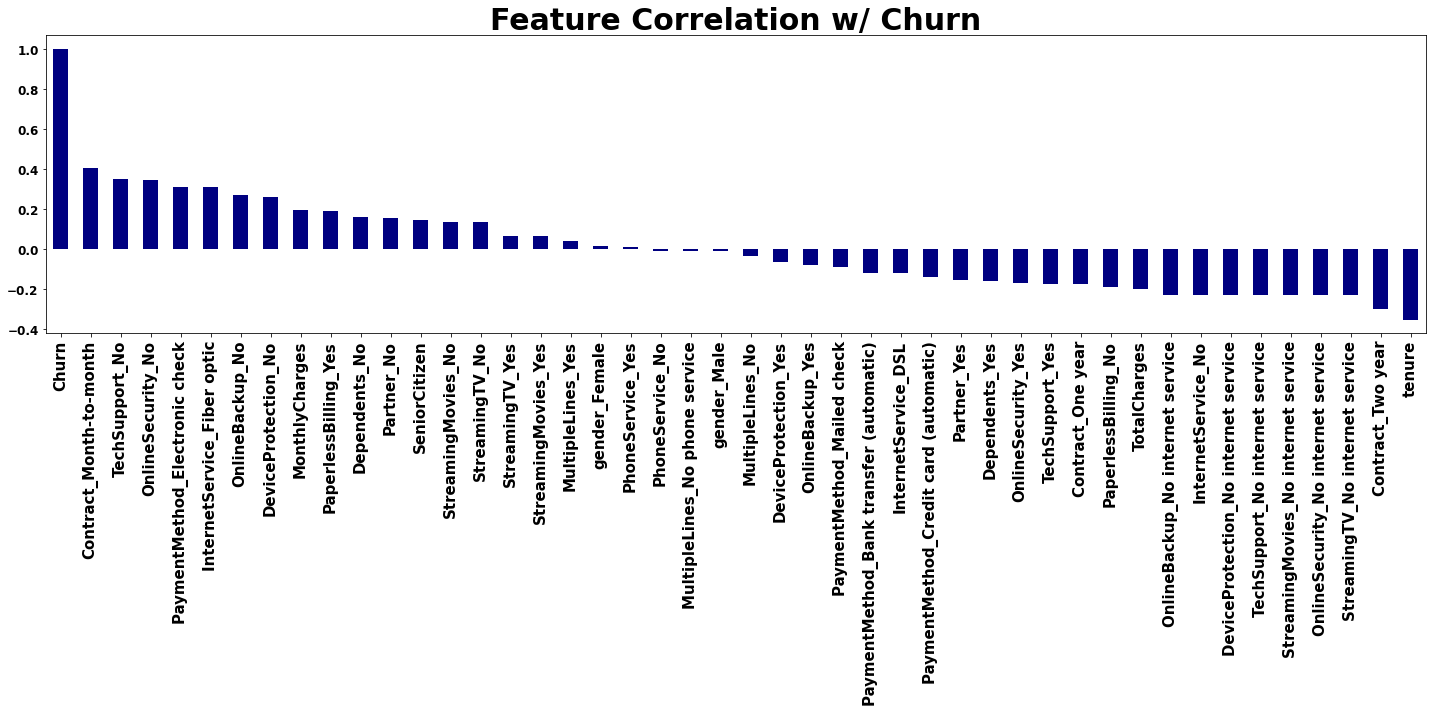

In [125]:
# Plot correlations between our features and our target feature, churn, as a bar plot, sort by descending order
dummy_df.corr()['Churn'].sort_values(ascending = False).plot(kind ='bar', figsize = (20, 10), color = 'Navy')
plt.title('Feature Correlation w/ Churn', fontsize = 30, fontweight = 'bold')
plt.xticks(fontsize = 15, fontweight = 'bold')
plt.yticks(fontweight = 'bold', fontsize = 12)
# plt.savefig('pics/Regression_pics/corr.png')
plt.tight_layout()

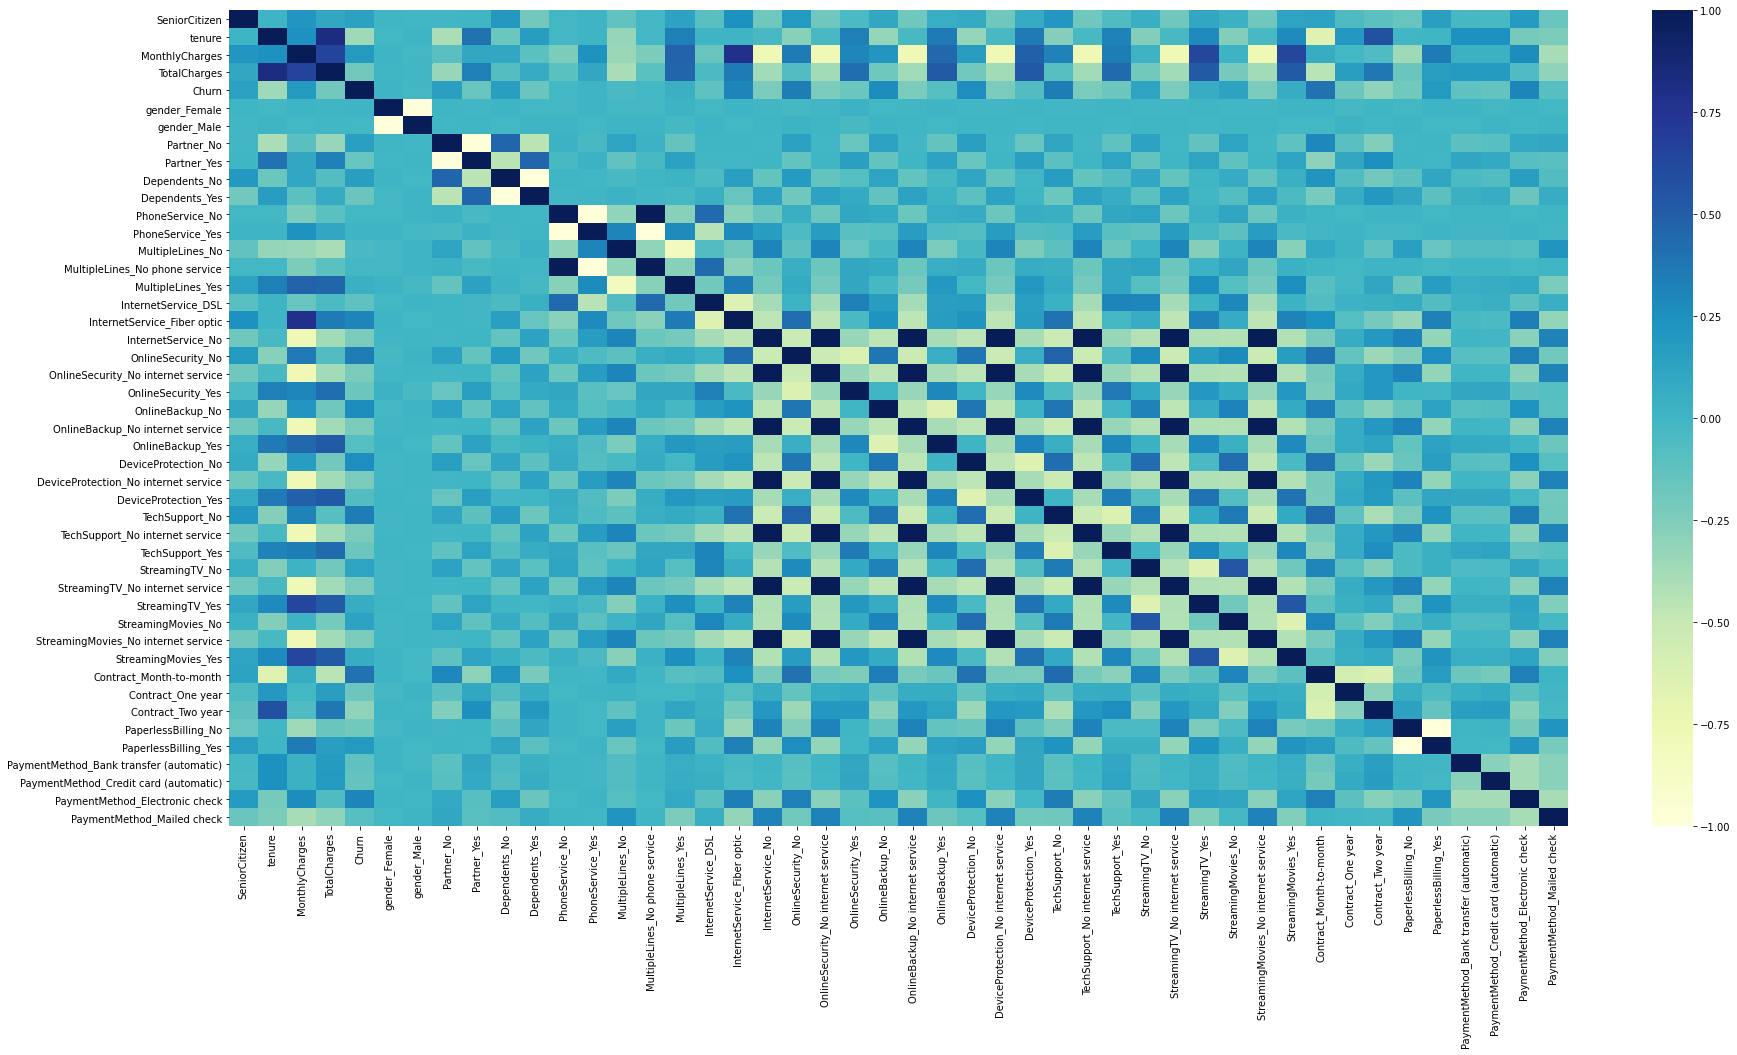

In [126]:
# Visualize a heatmap for our features correlation values
plt.figure(figsize = (30, 15))
x = sns.heatmap(dummy_df.corr(), cmap = 'YlGnBu')

##### From our heatmap and correlation barplot, we see that monthly contract, and a lack of online security or techsupport have the strongest positive correlation with churn. 2-Year Contracts and not having internet service are the most negatively correlated with churn.


###Pre-Processing Data for Logistic Regression

In [127]:
# Establish our target feature, churn, as our y feature
y = dummy_df.Churn.values
# Drop our target feature from our features dataframe
X = dummy_df.drop('Churn', axis = 1)
# Save dataframe column titles to list for reassigning after min max scale 
cols = X.columns

### Scaling our Data


In [128]:
# Instantiate min-max scaling object
mm = MinMaxScaler()
# Fit and transform our feature dataframe
X = pd.DataFrame(mm.fit_transform(X))
# Reassign column names so new dataframe has corresponding names
X.columns = cols


### Train Test Split


In [129]:
# Perform train test split from our target feature series and the predicting feature dataframe (set test size to 25% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 33)

### Fitting the Model

In [130]:
np.nan_to_num(X_train)


array([[0.        , 0.16901408, 0.54278607, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 1.        , 0.8681592 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.1971831 , 0.01343284, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.38028169, 0.71492537, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01408451, 0.01393035, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.42253521, 0.81293532, ..., 0.        , 1.        ,
        0.        ]])

In [131]:
# Instantiate a Logistic Regression model without an intercept. C is set to an arbitrarily large number. Use 'liblinear' solver method.
logreg = LogisticRegression()
# Fit the model to our X and y training sets
logreg.fit(X_train, y_train)

# clf = LogisticRegression(penalty='l2').fit(X_train, y_train)
# # predict probabilities
# predictions = clf.predict_proba(X_test)[:, 1]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [132]:
# Generate model prediction data for train and test sets
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

### Evaluating Model Performance
How many times was the classifier correct on the training set?

In [133]:
# Find residual differences between train data and predicted train data
residuals = np.abs(y_train - y_hat_train)
# Print value counts of our predicted values 
print(pd.Series(residuals).value_counts())
print('----------------------------------')
# Print normalized value counts of our predicted values
print(pd.Series(residuals).value_counts(normalize = True))

0    3269
1     780
dtype: int64
----------------------------------
0    0.80736
1    0.19264
dtype: float64


Train Set Results:  \n  
4270 Correct (1012 Incorrect)  \n  
80.7 % Accuracy

### How many times was the classifier correct on the test set?


In [134]:
# Repeat previous step with test data
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print('---------------------------------')
print(pd.Series(residuals).value_counts(normalize = True))

0    811
1    202
dtype: int64
---------------------------------
0    0.800592
1    0.199408
dtype: float64


Test Set Results:  \n  
1409 Correct (352 Incorrect)  \n  
80.05% Accuracy

### Confusion* Matrix


In [135]:
# Call confusion_matrix function from sklearn.metrics using actual y_test and predicted y_test data sets 
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix) 

Confusion Matrix: 
 [[664  78]
 [124 147]]


In [175]:
# Print 4 main logistic model metrics for training and test sets (Precision, Recall, Accuracy, F1)
from sklearn.metrics import classification_report
trainreport = classification_report(y_train, y_hat_train)
print("Train report:")
print(trainreport)
print("***********************************************")
testreport = classification_report(y_test, y_hat_test)
print("Test report:")
print (testreport)


#print_metrics(y_train, y_hat_train, y_test, y_hat_test)

Train report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      2988
           1       0.66      0.55      0.60      1061

    accuracy                           0.81      4049
   macro avg       0.75      0.72      0.74      4049
weighted avg       0.80      0.81      0.80      4049

***********************************************
Test report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       742
           1       0.65      0.54      0.59       271

    accuracy                           0.80      1013
   macro avg       0.75      0.72      0.73      1013
weighted avg       0.79      0.80      0.79      1013



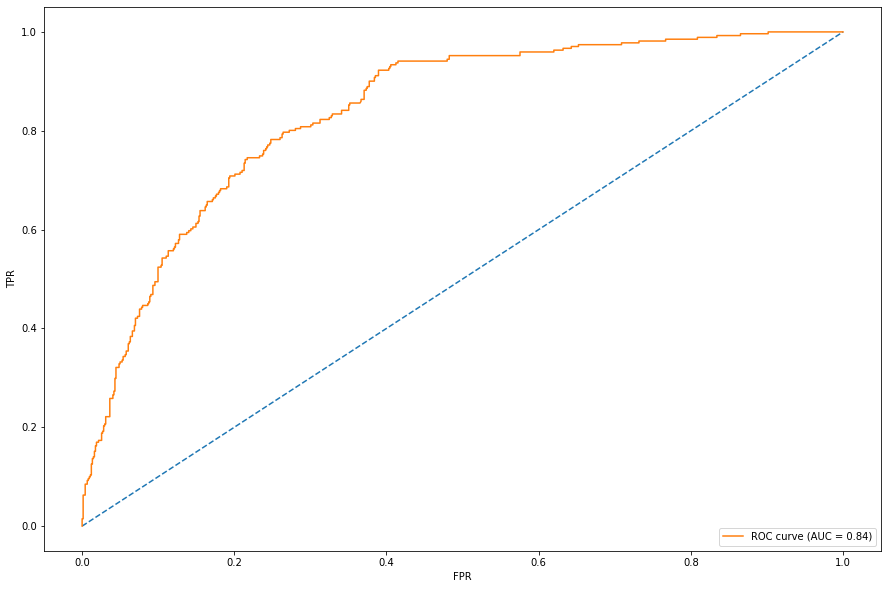

In [181]:
# calculate scores
predictions = logreg.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, predictions)

# calculate roc curves
fpr, tpr, _ = roc_curve(y_test, predictions)

plt.figure(figsize=(15, 10))
# plot horizontal line 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
# axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend(loc='lower right')
# show the plot
plt.show()


### Plot ROC Curves
We will now calculate probability scores for our y-train and y-test datasets. We use the false positive and true positive rates to plot a ROC Curve (receiver operating characteristic curve) for both train and test sets.

In [183]:
auc

0.8385161277488785